In [15]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.integrate as spi
# figsize parameter
plt.rcParams['figure.figsize'] = [9, 6]

# Electric Field of a charged sphere and ring

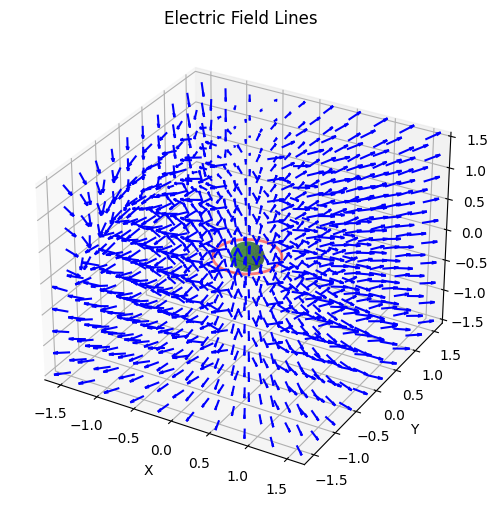

In [16]:
# Constants
k = 8.9875e9  # Coulomb's constant in N m^2 / C^2

# Function to calculate the electric field created by a charged ring at position (x, y, z) at point (x0, y0, z0)
def electric_field_of_charged_ring(q, radius, z0, x, y, z):
    r = np.sqrt(x**2 + y**2)
    cos_theta = x / r
    sin_theta = y / r
    r_hat = np.stack([cos_theta, sin_theta, np.zeros_like(x)], axis=-1)
    r_perp = np.sqrt(r**2 + (z - z0)**2)
    return (k * q * radius / (r_perp**2)).reshape(-1, 1) * r_hat

# Function to calculate the electric field created by a charged sphere at position (x, y, z) at point (x0, y0, z0)
def electric_field_of_charged_sphere(q, radius, x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    r_hat = np.array([x / r, y / r, z / r])
    return (k * q / (r**2)) * r_hat

# Function to calculate the electric field created by a charged sphere with varying surface charge density
def electric_field_of_charged_sphere_with_density(radius, x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r)
    phi = np.arctan2(y, x)

    # Surface charge density function
    sigma = 50 * np.sin(theta) * np.cos(phi)*5

    # Integrate to find the electric field due to the charged sphere
    electric_field_x = np.zeros_like(x)
    electric_field_y = np.zeros_like(y)
    electric_field_z = np.zeros_like(z)

    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            for k in range(x.shape[2]):
                # Differential charge element dq = sigma * r^2 * sin(theta) d(theta) d(phi)
                dq = sigma[i, j, k] * r[i, j, k]**2 * np.sin(theta[i, j, k])

                # Electric field contribution from differential charge element
                r_vec = np.array([x[i, j, k], y[i, j, k], z[i, j, k]])
                r_mag = np.linalg.norm(r_vec)
                r_hat = r_vec / r_mag
                electric_field_i = (k * dq / (r_mag**2)) * r_hat

                electric_field_x[i, j, k] = electric_field_i[0]
                electric_field_y[i, j, k] = electric_field_i[1]
                electric_field_z[i, j, k] = electric_field_i[2]

    return electric_field_x, electric_field_y, electric_field_z

# Example usage
charge_q_ring = 1.0e-6  # Charge of the ring in Coulombs
ring_radius = 0.4  # Radius of the ring in meters
ring_z0 = 0.0  # Z-coordinate of the ring center in meters

sphere_radius = 0.2  # Radius of the sphere in meters

# Define a grid of points in 3D space
num_points_xyz = 10
x = np.linspace(-1.5, 1.5, num_points_xyz)
y = np.linspace(-1.5, 1.5, num_points_xyz)
z = np.linspace(-1.5, 1.5, num_points_xyz)
x, y, z = np.meshgrid(x, y, z)

# Calculate the electric field due to the charged ring at each point in the grid
electric_field_ring_xyz = electric_field_of_charged_ring(charge_q_ring, ring_radius, ring_z0, x.flatten(), y.flatten(), z.flatten())

# Reshape the arrays to match the grid shape
electric_field_ring_x = electric_field_ring_xyz[:, 0].reshape(num_points_xyz, num_points_xyz, num_points_xyz)
electric_field_ring_y = electric_field_ring_xyz[:, 1].reshape(num_points_xyz, num_points_xyz, num_points_xyz)
electric_field_ring_z = electric_field_ring_xyz[:, 2].reshape(num_points_xyz, num_points_xyz, num_points_xyz)

# Calculate the electric field due to the charged sphere with varying surface charge density
electric_field_sphere_x, electric_field_sphere_y, electric_field_sphere_z = electric_field_of_charged_sphere_with_density(sphere_radius, x, y, z)

# Combine the electric fields due to the charged ring and the charged sphere
electric_field_x = electric_field_ring_x + electric_field_sphere_x
electric_field_y = electric_field_ring_y + electric_field_sphere_y
electric_field_z = electric_field_ring_z + electric_field_sphere_z

# Create a 3D plot for electric field lines
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Draw electric field lines using quiver plot
ax.quiver(x, y, z, electric_field_x, electric_field_y, electric_field_z, length=0.2, normalize=True, color='b')

# Add a charged ring at the origin for visualization
u = np.linspace(0, 2 * np.pi, 100)
x_ring = ring_radius * np.cos(u)
y_ring = ring_radius * np.sin(u)
z_ring = ring_z0 * np.ones_like(u)
ax.plot(x_ring, y_ring, z_ring, color='r', alpha=0.5,lw=2)

# Add a charged sphere at the origin for visualization
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = sphere_radius * np.outer(np.cos(u), np.sin(v))
y_sphere = sphere_radius * np.outer(np.sin(u), np.sin(v))
z_sphere = sphere_radius * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='g', alpha=0.5)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('Electric Field Lines')
plt.show()

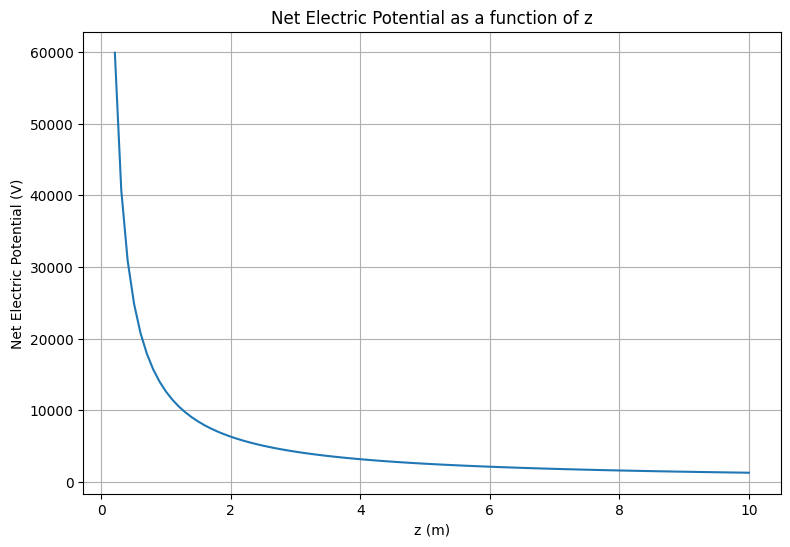

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 8.9875e9  # Coulomb's constant in N m^2 / C^2

# Function to calculate the electric potential due to a charged ring at position (0, 0, z) at point (0, 0, z0)
def electric_potential_of_charged_ring(q, radius, z0, z):
    r_perp = np.abs(z - z0)
    return (k * q * radius / r_perp)

# Function to calculate the electric potential due to a charged sphere at position (0, 0, z) at point (0, 0, 0)
def electric_potential_of_charged_sphere(q, radius, z):
    r = np.abs(z)
    return (k * q / r)

# Charge and radius for the charged ring and sphere (same as in the example)
charge_q_ring = 1.0e-6  # Charge of the ring in Coulombs
ring_radius = 0.4  # Radius of the ring in meters
sphere_radius = 0.2  # Radius of the sphere in meters

# Define an array of z values from 0 to 10 with 100 data points
z_values = np.linspace(0.21, 10, 100)

# Calculate the electric potentials due to the charged ring at each z value (at the origin (0, 0, 0))
electric_potentials_ring = electric_potential_of_charged_ring(charge_q_ring, ring_radius, 0, z_values)

# Calculate the electric potentials due to the charged sphere at each z value (at the origin (0, 0, 0))
electric_potentials_sphere = electric_potential_of_charged_sphere(charge_q_ring, sphere_radius, z_values)

# Compute the net electric potential as the sum of the potentials due to the ring and the sphere
net_electric_potential = electric_potentials_ring + electric_potentials_sphere

# Plot the net electric potential as a function of z
plt.plot(z_values, net_electric_potential)
plt.xlabel('z (m)')
plt.ylabel('Net Electric Potential (V)')
plt.title('Net Electric Potential as a function of z')
plt.grid(True)
plt.show()



# Electric Field created by an ellipsoide

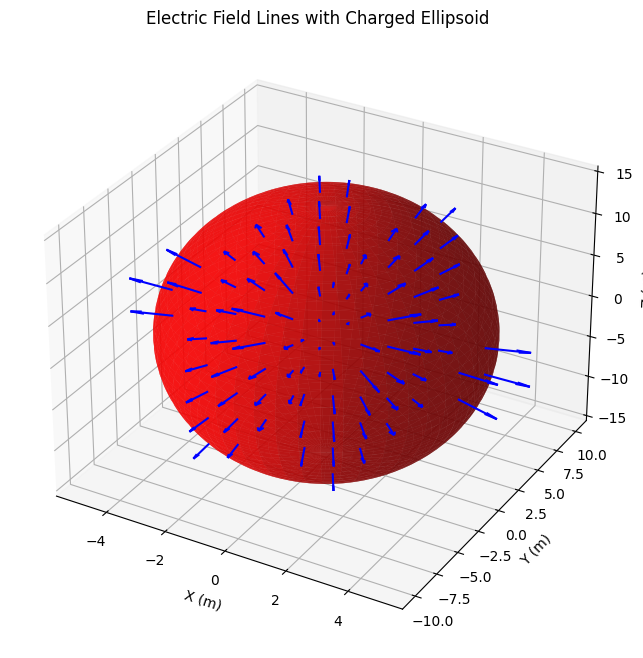

In [36]:
# Function to calculate the electric field created by a charged ellipsoid at position (x, y, z) at point (x0, y0, z0)
def electric_field_of_charged_ellipsoid(sigma, a, b, c, x, y, z):
    r = np.sqrt(x**2 / a**2 + y**2 / b**2 + z**2 / c**2)

    # Inside the ellipsoid, the charge density is sigma
    sigma_func = np.where(r <= 1, sigma, 0)

    # Integrate to find the electric field due to the charged ellipsoid
    electric_field_x = np.zeros_like(x)
    electric_field_y = np.zeros_like(y)
    electric_field_z = np.zeros_like(z)

    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            for k in range(x.shape[2]):
                # Differential charge element dq = sigma * r^2 * sin(theta) d(theta) d(phi)
                dq = sigma_func[i, j, k] * (a * b * c) / (r[i, j, k]**2)

                # Electric field contribution from differential charge element
                r_vec = np.array([x[i, j, k], y[i, j, k], z[i, j, k]])
                r_mag = np.linalg.norm(r_vec)
                r_hat = r_vec / r_mag
                electric_field_i = (k * dq / (r_mag**2)) * r_hat

                electric_field_x[i, j, k] = electric_field_i[0]
                electric_field_y[i, j, k] = electric_field_i[1]
                electric_field_z[i, j, k] = electric_field_i[2]

    return electric_field_x, electric_field_y, electric_field_z, sigma_func

# Example usage
sigma = 15.0  # Charge density inside the ellipsoid in C/m^3
a = 5.0      # Semi-major axis of the ellipsoid in meters
b = 10.0     # Semi-intermediate axis of the ellipsoid in meters
c = 15.0     # Semi-minor axis of the ellipsoid in meters

# Define a grid of points in 3D space
num_points_xyz = 20
x = np.linspace(-30, 30, num_points_xyz)
y = np.linspace(-30, 30, num_points_xyz)
z = np.linspace(-30, 30, num_points_xyz)
x, y, z = np.meshgrid(x, y, z)

# Calculate the electric field due to the charged ellipsoid and get the charge density
electric_field_x, electric_field_y, electric_field_z, charge_density = electric_field_of_charged_ellipsoid(sigma, a, b, c, x, y, z)

# Create a 3D plot for electric field lines and charged ellipsoid
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Draw electric field lines using quiver plot
ax.quiver(x, y, z, electric_field_x, electric_field_y, electric_field_z, length=1.5, normalize=True, color='b')

# Plot the charged ellipsoid itself
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_ellipsoid = a * np.outer(np.cos(u), np.sin(v))
y_ellipsoid = b * np.outer(np.sin(u), np.sin(v))
z_ellipsoid = c * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x_ellipsoid, y_ellipsoid, z_ellipsoid, color='r', alpha=0.7)

# Set axis labels
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')

plt.title('Electric Field Lines with Charged Ellipsoid')
plt.show()

## Electric potential profile for the charged ellipsoid at $z=0$

/tmp/ipykernel_3757/2763319353.py:29: RuntimeWarning: divide by zero encountered in log10
  log_electric_potential = np.log10(electric_potential)


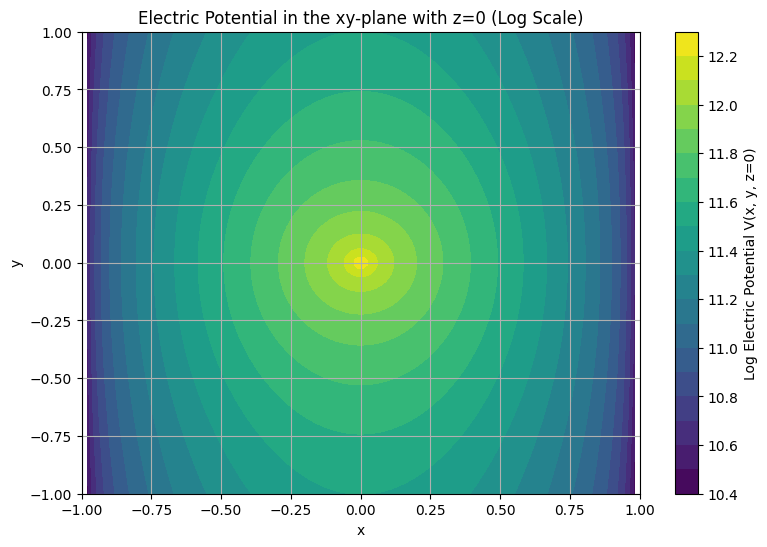

In [35]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

# Define the charge density function
def charge_density(x, y, z_prime):
    a = 1.0
    b = 2.0
    q = 10.0
    epsilon_0 = 8.854187817e-12  # Vacuum permittivity

    return q * np.sqrt(a**2 - z_prime**2) * np.sqrt(b**2 - z_prime**2) / (4 * np.pi * epsilon_0 * np.sqrt(1 + z_prime**2) * np.sqrt(x**2 + y**2 + (z_prime)**2))

# Create an array of x and y values for the plot
x_values = np.linspace(-1, 1, 100)
y_values = np.linspace(-1, 1, 100)

# Create a meshgrid for x and y values
x_mesh, y_mesh = np.meshgrid(x_values, y_values)

# Calculate the electric potential at each (x, y) point with z=0 using numerical integration
electric_potential = np.zeros_like(x_mesh)

for i in range(len(x_values)):
    for j in range(len(y_values)):
        electric_potential[i, j], _ = spi.quad(charge_density, -1, 1, args=(x_values[i], y_values[j]))

# Take the logarithm of the electric potential for the colorbar in log scale
log_electric_potential = np.log10(electric_potential)

# Plot the electric potential in the xy-plane with colorbar in log scale
plt.contourf(x_mesh, y_mesh, log_electric_potential, levels=20, cmap='viridis')
plt.colorbar(label='Log Electric Potential V(x, y, z=0)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Electric Potential in the xy-plane with z=0 (Log Scale)')
plt.grid(True)
plt.show()
